## Subspace based estimation

We consider a system that transmits a waveform. 
This waveform is reflected by a few reflectors 
and the signal is backpropagated towards the transmiter. 
The estimates of delays of backpropagated waves enable estimation of 
distances to the reflectors. We assume that the amplitude of reflectors fluctuates
and follow $\mathcal{N}(0,\sigma_k^2)$ distributions where $\sigma_k^2$ is the power of reflector $k$, with $k=1:K$ ($K$ is the total number of refectors). 

To get a good estimate of the distance to reflectors we assume $N$ independant realization of the experiment, leading to time sampled observations
$$
y_{n,t} = \sum_{k=1:K}\alpha_{n,k}s_{t-\tau_k} + w_t,n
$$
with $k=1:K$ the reflector index, $n=1:N$ the experiment index and $t=0:T-1$ the time index. $s_t$ is the transmitted waveform at $t$-th time index. For the sake of simplicity we assume that delays $\tau_k$ are integer multiples of the sampling period. 
We assume also that amplitudes $\alpha_{n,k}\sim \mathcal{N}(0,\sigma_k^2)$ are independant among experiments and reflectors and from the white observation noise $w_{t,n}$, with variance $\sigma_w^2$. Put in a vector form, experiment $n$ writes
$$
{\bf y}_n = \left[ {\bf s}_1,\ldots,{\bf s}_K\right]
\begin{pmatrix}
\alpha_{n,1} \\ \vdots \\ \alpha_{n,K}
\end{pmatrix}
= {\bf S}\boldsymbol{\alpha}_n
+ {\bf w}_n
$$
- 1 - We plot the transmitted waveform, defined for $t=-10:10$ by 
$$
s(t) = (1- 2\left(\frac t 4\right)^2)\;\exp(-\left(\frac t 4\right)^2)
$$ 
and 0 elsewhere.
- 2 - We generate $N=1000$ experimental data vectors ${\bf Y} =[{\bf y}_1,\ldots, {\bf y}_N]$ of length $T=50$ with $K=3$ reflectors that correspond to delays $\tau_1,\tau_2,\tau_3 = 12,25,35$ and variances of reflected amplitudes $\sigma_1^2,\sigma_2^2,\sigma_3^2 = 3,2,1$. In addition, we assume that $\sigma_w^2=1$.
- 3 - We compute the data covariance matrix
- 4 - We use the subspace method presented in the lesson to estimate the time delays. 


In [1]:
using Plots
using LinearAlgebra
using Distributions

In [2]:
function s(t)
    return (1 .-2*(t/4).^2).*exp.(-(t/4).^2)
end

s (generic function with 1 method)

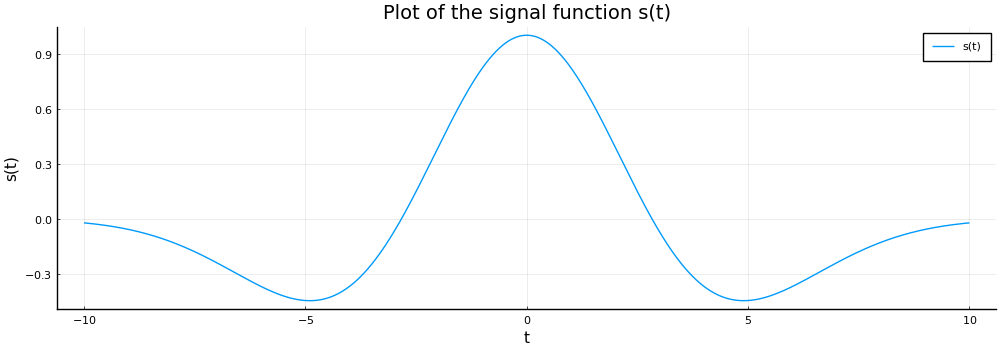

In [3]:
pyplot(size=(1000,350))
t= -10:0.01:10
s_values = s(t)
# Plot the function
plot(t, s_values, label="s(t)", xlabel="t", ylabel="s(t)", title="Plot of the signal function s(t)")

In [4]:
N=1000
reflector_delays=[12,25,35]
reflector_var = [3,2,1]
white_noise_var = 1
T=50
time = 0:T-1

0:49

In [5]:
Y = Vector{Vector{Float64}}(undef, N)

for i in 1:N
    #Y[i] = sum(s(time .- reflector_delays[k]) .* (rand(Normal(0, reflector_var[k])) ) for k in 1:3) .+ rand(Normal(0, white_noise_var), length(time))
    signal_contribution = sum(s(time .- reflector_delays[k]) .* rand(Normal(0, reflector_var[k])) for k in 1:3)
    noise_contribution = rand(Normal(0, white_noise_var), length(time))  # Adding white noise to the entire signal
    Y[i] = signal_contribution .+ noise_contribution  # Sum of signal + noise
end


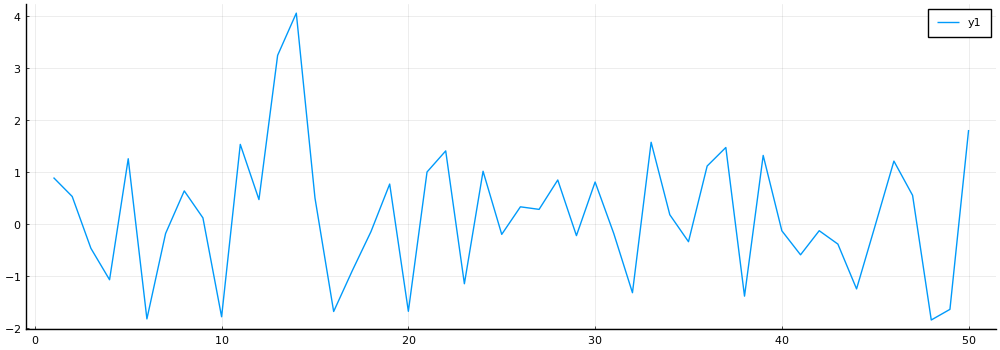

In [6]:
plot(Y[1])

In [7]:
#Covariance matrix
R = (1/N) .* sum(Y[i] * transpose(Y[i]) for i in 1:N)

50×50 Matrix{Float64}:
  0.929554     0.052516    -0.0207501    …   0.0298835   -0.0405406
  0.052516     0.944581     0.0163564        0.0274623    0.0425343
 -0.0207501    0.0163564    1.0045           0.0261032   -0.0119679
 -0.02334      0.0132968    0.0106988        0.0296402    0.0235691
  0.0474664    0.0164666    0.0254825        0.0374675    0.040951
  0.0106614   -0.0120593    0.013118     …   0.0200936   -0.00695385
 -0.0031812   -0.0105523    0.108768         0.0156826   -0.00507496
  0.0846694    0.0418409    0.0390028        0.0714405   -0.0178756
  0.0556933    0.0144408    0.0658599        0.0514661    0.0326014
  0.00876619   0.0312174    0.0390175        0.00558914  -0.019432
 -0.0323739    0.0138596   -0.0988476    …  -0.0601171   -0.0103768
 -0.0329573   -0.0635064   -0.207702        -0.150251     0.0326589
 -0.0863717   -0.0536102   -0.222828        -0.158452     0.00483997
  ⋮                                      ⋱               
 -0.0264309    0.0164137   -0.0309

Subspace method to estimate the time delays 

In [8]:
eigen_decomp = eigen(R) 
U = eigen_decomp.vectors
D = eigen_decomp.values 
D

50-element Vector{Float64}:
  0.6125465628524954
  0.6351600894652468
  0.6587893682910853
  0.6715956212964524
  0.6909948631509163
  0.7254541488166768
  0.7353792932933757
  0.7430598929163855
  0.757540086338753
  0.7724216144601804
  0.810605021542204
  0.820256652786711
  0.8325326932717104
  ⋮
  1.215903459330107
  1.2497445554257178
  1.2608310633945852
  1.2693172601400131
  1.2832247742896825
  1.3571970338255417
  1.3825429416550445
  1.4113163261073955
  1.4366235794827003
  5.066753160484452
 14.849047387069001
 32.10592379313194

Theoretically
### Ry = U × diag{λ1 + $\sigma_w^2$, . . . , λp + $\sigma_w^2$, $\sigma_w^2$, . . . , $\sigma_w^2$} × $U^T$

As N increases, the estimate of the covariance matrix becomes more accurate, which leads to more accurate estimates of the eigenvalues. This means that the eigenvalues that correspond to the noise subspace should become closer to 1 as N increases.

In [9]:
D = Diagonal(D) 
U*D*U' 

50×50 Matrix{Float64}:
  0.929554     0.052516    -0.0207501    …   0.0298835   -0.0405406
  0.052516     0.944581     0.0163564        0.0274623    0.0425343
 -0.0207501    0.0163564    1.0045           0.0261032   -0.0119679
 -0.02334      0.0132968    0.0106988        0.0296402    0.0235691
  0.0474664    0.0164666    0.0254825        0.0374675    0.040951
  0.0106614   -0.0120593    0.013118     …   0.0200936   -0.00695385
 -0.0031812   -0.0105523    0.108768         0.0156826   -0.00507496
  0.0846694    0.0418409    0.0390028        0.0714405   -0.0178756
  0.0556933    0.0144408    0.0658599        0.0514661    0.0326014
  0.00876619   0.0312174    0.0390175        0.00558914  -0.019432
 -0.0323739    0.0138596   -0.0988476    …  -0.0601171   -0.0103768
 -0.0329573   -0.0635064   -0.207702        -0.150251     0.0326589
 -0.0863717   -0.0536102   -0.222828        -0.158452     0.00483997
  ⋮                                      ⋱               
 -0.0264309    0.0164137   -0.0309

## Signal Supspace 
### span{s(θ1), . . . , s(θK)} = span{U1, . . . , UK} = span{$U_{K+1}$, . . . , $U_N$ }$^⊥$

#### We seperate the signal subsapce and noise subspace (which are orthogonal). The signal subspace is the span of the eigenvectors corresponding to the largest eigenvalues from the EVD of R (the last 3 in our case) 

In [10]:
signal_eigenvectors = U[:, end-2:end]
noise_eigenvectors = U[:, 1:end-3]

50×47 Matrix{Float64}:
 -0.174213    -0.249948    -0.0619319   …   0.0212561   -0.108924
  0.0242343    0.305832     0.127129        0.0211341    0.059772
 -0.145461    -0.0881992    0.0144747       0.203227     0.171296
 -0.108462    -0.0195581   -0.186863        0.271611    -0.0213774
  0.0806406    0.0432608    0.0436607      -0.0312045   -0.064694
 -0.00327824   0.00911121  -0.0861055   …  -0.177412    -0.106952
  0.106351     0.0344455    0.20504        -0.105156    -0.0550294
 -0.0974892   -0.0726771    0.137421       -0.069309    -0.0612856
 -0.226365     0.302872    -0.191911       -0.038129    -0.0114883
 -0.0673599    0.12814      0.0296795       0.0933645    0.185767
  0.0379516   -0.152327    -0.0455542   …  -0.142173    -0.144903
  0.0697965   -0.0434745   -0.0103483       0.06948     -0.113388
 -0.0218135    0.0905719   -0.0998633      -0.149108     0.0777126
  ⋮                                     ⋱   ⋮           
 -0.291607    -0.127358    -0.021192        0.0225662   -

#### We are looking for parameters that minimize the projection onto the noise subspace.

In [11]:
Amp = [rand(Normal(0, reflector_var[k])) for k in 1:3]

3-element Vector{Float64}:
 3.035133393915082
 0.788622670180239
 1.0384333339076466

In [12]:
using Optim

# Transpose noise eigenvectors
U_noise = transpose(noise_eigenvectors)

function signal(t, τ)
    return sum(s(t .- τ[k]) .* Amp[k] for k in 1:3)
end

# The objective function g(τ) to minimize
function g(τ)
    T = 50
    t = 0:T-1
    signal_component = U_noise * signal(t, τ)
    return norm(signal_component)
end


g (generic function with 1 method)